## Statistical Analysis of Diabetes and Movie Datasets


#### Question 1

Consider the following data set of per capita consumption of mozzarella cheese and computer science degrees awarded,
for years 2000 to 2009.

In [2]:
# Per capita consumption of mozzarella cheese (US)
# 2000 to 2009
# (in lbs) 

cheese <- c(9.3,9.7,9.7,9.7,9.9,10.2,10.5,11,10.6,10.6)

# Computer science doctorates awarded (US)
csdegrees <- c(861,830,809,867,948,1129, 1453, 1656, 1787, 1611)

(a) Plot the most appropriate graph to determine if the data is correlated

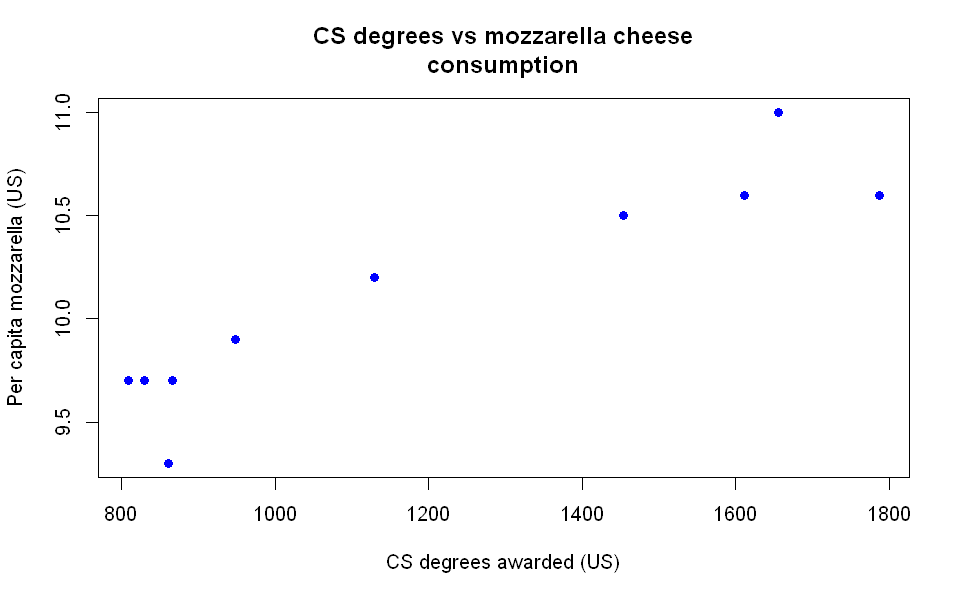

In [3]:
options(repr.plot.width = 8, repr.plot.height = 5)
plot(csdegrees, cheese, xlab = "CS degrees awarded (US)", ylab = "Per capita mozzarella (US)", main = "CS degrees vs mozzarella cheese
consumption", pch = 16, col = "blue")

(b) Run the best test to determine linear correlation together with calculated 95% confidence intervals  

In [4]:
# Run a Pearson's product-moment correlation test to determine the correlation between csdegrees awarded in the US from 2001-2009 and
# mozarella cheese consumption per capita in the US. 

cor_test <- cor.test(csdegrees, cheese, conf.level = 0.95)
cat("p-value: ", cor_test$p.value, "\n")

cat("Linear Correlation: ", cor_test$estimate, "\n", "95% Confidence interval: ", cor_test$conf.int)

p-value:  0.0001059155 
Linear Correlation:  0.9283097 
 95% Confidence interval:  0.7188325 0.9832424

(c) Can you conclude the datasets are correlated? Give an explanation for why you think it is/is not the case

Yes, we can conclude the data sets are correlated. This is because the p-value given by the pearson test is 0.0001 which is statistically significant if we assume an $\alpha$ of 0.05 and even 0.01. Using the permutation test below as well where the redline on the histogram indicates where the observed linear correlation value would lie, we can conclude similar results as it is outside the bounds of the critical values for when $\alpha$ is 0.05. 

[1] 0

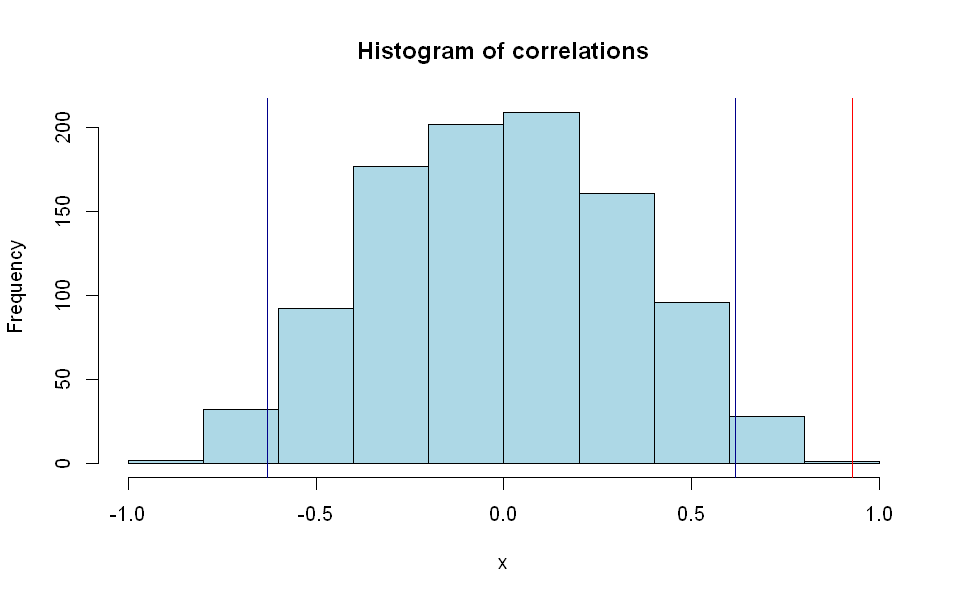

In [5]:
options(repr.plot.width = 8, repr.plot.height = 5)
x <- replicate(1000, {
    perm.csdegrees <- sample(csdegrees, replace = TRUE)
    sim <- cor.test(perm.csdegrees, cheese, conf.level = 0.95)$estimate
    })

hist(x, col = 'lightblue', main = "Histogram of correlations")

abline(v = c(cor_test$estimate), col = 'red')

# critical p values.
crit_p <- quantile(x, c(0.025, 0.975))
abline(v = crit_p, col = 'darkblue')

# P test
p_val <- mean(x>cor_test$estimate)+ mean(x < -cor_test$estimate)
p_val

(d) Perform a least-squares fit, plotting the original data points plus the appropriate line on the same graph.

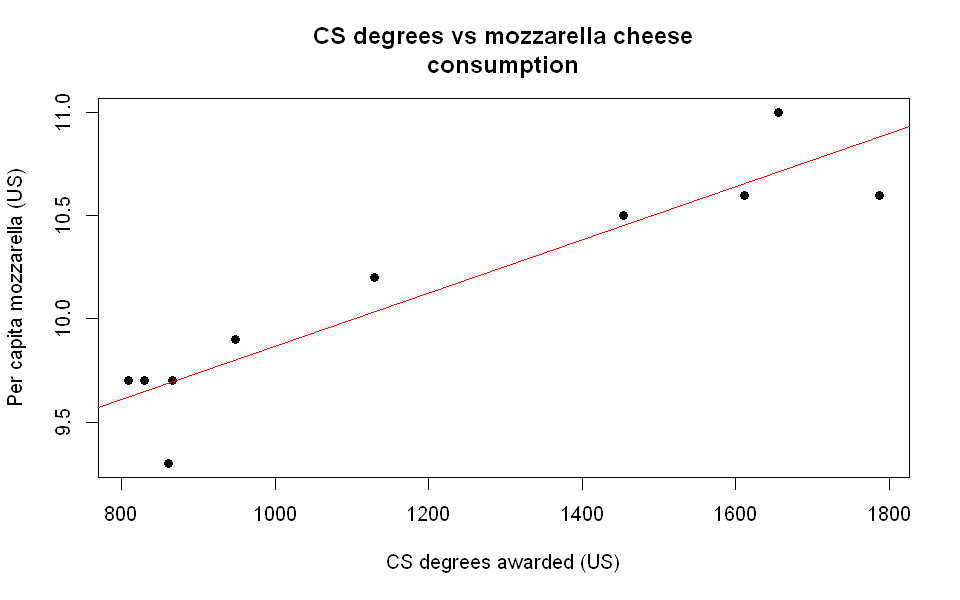

In [6]:
# using the lienar model function to find the 'fitted' values of 'a' and 'b' to draw the line of best fit.
options(repr.plot.width = 8, repr.plot.height = 5)
fcc <- lm(cheese~csdegrees, data = as.data.frame(cbind(csdegrees, cheese)))
plot(csdegrees, cheese, xlab = "CS degrees awarded (US)", ylab = "Per capita mozzarella (US)", main = "CS degrees vs mozzarella cheese
consumption", pch = 16)
abline(fcc, col = 'red')

(d) Do you think looking at the line, that this fit is a good explanation? Please give reasons for your choice. Then, using a test given already in the course, plot a graph to demonstrate if this is indeed a good fit.

Yes, the fit, from inspection, seems to be a good explanation of the trend of the data. This is because the fit seems to minimize the distance between all the data points as we can see from the line and it also shows a positive relationship between the two variables which seems to be the case from superficial inspection of the data points on the plot. Also the datapoints tend to indicate a linear trend which is being shown by the line.

However, to see if this is actually a good fit, we should plot a residual graph which should give us a more exact understanding of the how the residuals are scattered. 

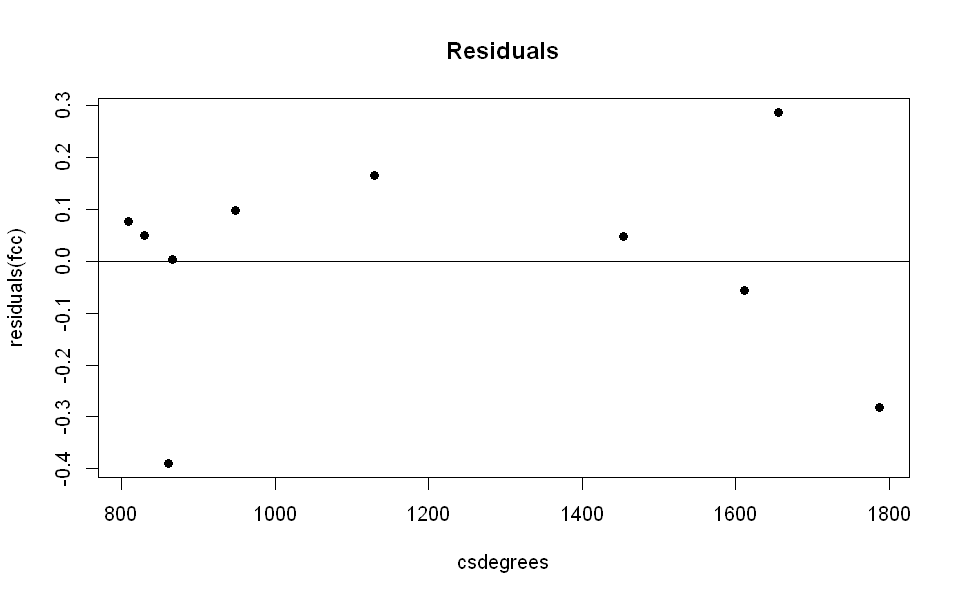

In [7]:
options(repr.plot.width = 8, repr.plot.height = 5)
plot(csdegrees, residuals(fcc), main = "Residuals", pch = 16)
abline(h=0)

Here we can see that in general, the residuals are scattered evenly above and below the 0 horizontal line, so it seems to show the residuals don't follow any particular trend which indicates the linear model is a good fit.

(e) Can we conclude that computer science PhD awards affect mozzerella cheese consumption ? Explain your answer.

- Correlation doesn't imply causation. 

We cannot conclude that computer science Ph.D awards affect mozzerella cheese consumption because correlation doesn't imply casuation. There could be many reasons as to why computer science Ph.D awards and mozzerella cheese consumption seem to have a positive linear relationship. One could be due to a third variable that affects both Ph.D computer science awards and mozzerella cheese consumption.

(f) Give two suggested improvements to this test to improve the quality of the possible conclusions, explaining
why in each case these would help.

1) Look at the data of mozzerella cheese consumption for computer science degree holders instead of just the general population.

One way to improve the test is to get data about mozzerella cheese consumption for computer science degree holders. This would enable us to see a more direct correlation between mozzerella cheese consumption and computer science degree holders. If it is the case that mozzerella cheese consumption increases as one has a computer science degree, we can make a stronger claim that the correlation is one of causation.

2) Gather the mozzerella cheese consumption habits of different computer science degree level holders and those without.

Getting data about mozzerella cheese consumption and what level of computer science (if any) qualifications the person has will help us improve the test. It could be the case that those with higher degrees may have differing levels of mozerella cheese consumption compared with those with lesser qualifications (PH.D's vs Bachelors) and even those with no qualifications (regular people). If it is the case that those with higher CS degrees have higher mozzerella cheese consumption, we can again make a stronger claim about the correlations of CS degree holders and Mozzerella cheese consumption. It might be the case that we can find that mozzerella cheese consumption may be ranked by Ph.D > Masters > Bachelors > Regular people.

#### Question 2

(a) Download the dataset from https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

This contains information about the Pima people from North America.  A number of social and environmental factors have contributed to them having one of the highest rates of type 2 diabetes in the world. This data set contains information of around 700 female individuals, including
* ever.pregnant — Whether the individual has ever been pregnant
* diastolic — diastolic blood pressure
* bmi — Body Mass Index
* age — age in years




## Load the data set.

In [24]:
pima <- read.csv("C:/Users/User/Documents/GitHub/Statistics/pima-indians-diabetes.csv")

dimnames(pima)[[2]] <- c("preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class")

head(pima, 15)

preg,plas,pres,skin,test,mass,pedi,age,class
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0.0,0.232,54,1
4,110,92,0,0,37.6,0.191,30,0


(b) Is there evidence that body mass index differs for women who have had a pregnancy versus those that haven’t? In what direction is any difference? 

Use a t test to see if there is difference in the means between the two groups. 

$H_0, mu=0$:no difference in mean BMI for the two groups.

$H_1, mu!=0$: there is a difference in mean between the two groups. 

Is there a direction for the difference? which tail? 

In [25]:
# calculate the mean BMI for women who have been pregnant and those who have not been pregnant. 
# pregnant women
pregnant_df <- pima[pima['preg'] > 0, ]
BMI_pregnant <- pregnant_df$mass
mean(BMI_pregnant)

# non-pregnant
non_pregdf <- pima[pima['preg'] == 0,]
BMI_no_preg <- non_pregdf$mass
mean(BMI_no_preg)

#t.test
t.test(BMI_pregnant, BMI_no_preg, var.equal = FALSE)

[1] 31.60137

[1] 34.29009


	Welch Two Sample t-test

data:  BMI_pregnant and BMI_no_preg
t = -2.6296, df = 129.36, p-value = 0.009585
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.711682 -0.665754
sample estimates:
mean of x mean of y 
 31.60137  34.29009 


The t.test above shows a statistical significant difference between the means of pregnant pima women versus those who have not been pregnant where $p = 0.0099$ and a t value of $t = -2.6296$. There is a negative difference in that the mean of pregnant women have a lower BMI those who have not been pregnant. The t-value is in the direction of the left tail.

(c) Make an appropriate plot of the data.

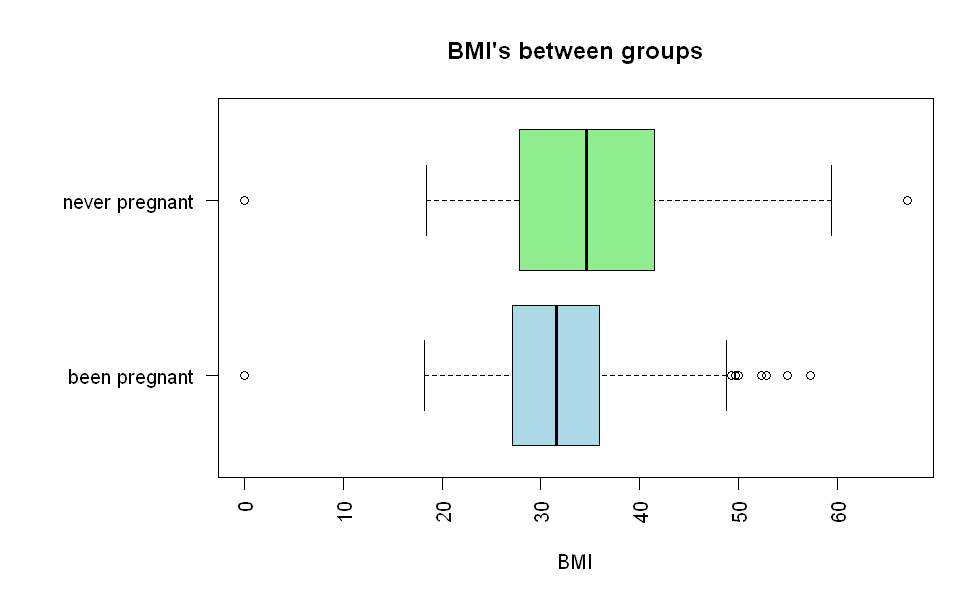

In [26]:
# Use a box and whisker plot to display the data. 
options(repr.plot.width = 8, repr.plot.height = 5)
par(mar=c(5,9,4,1)+.1)
boxplot(BMI_pregnant, BMI_no_preg, main = "BMI's between groups", at = c(1,2), names = c("been pregnant", "never pregnant"), 
        col = c("lightblue", "lightgreen"), horizontal = TRUE, las =2, xlab = "BMI")

Diastolic blood pressure is thought to vary by age. 

(d) Make an appropriate plot of the data. 

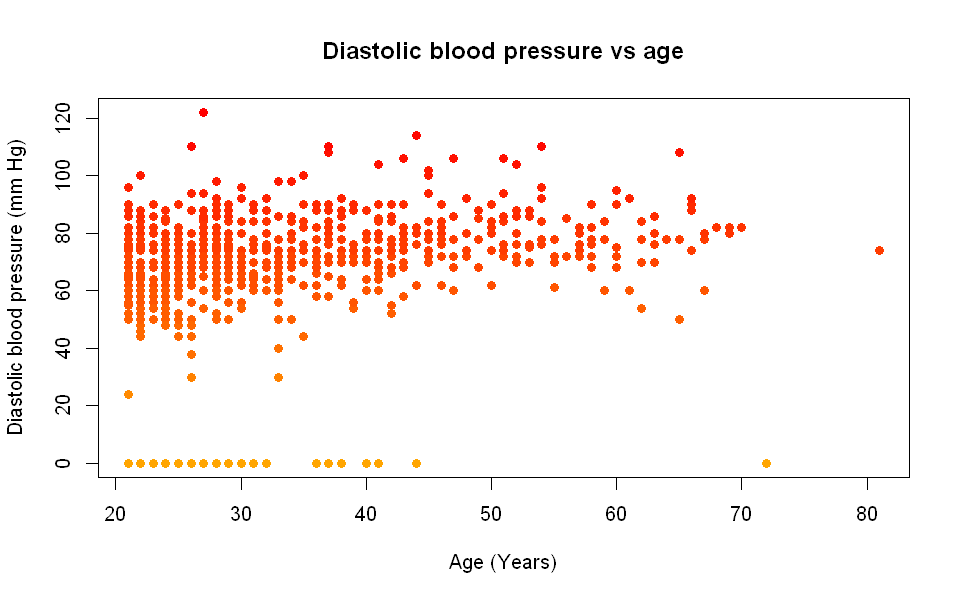

In [27]:
rbPal <- colorRampPalette(c('orange','red'))
pima$Col <- rbPal(20)[as.numeric(cut(pima$pres,breaks = 20))]

plot(pima$pres~pima$age, type = 'p', main = "Diastolic blood pressure vs age", xlab = "Age (Years)", 
     ylab = "Diastolic blood pressure (mm Hg)", col = pima$Col, pch = 16)

(e) Compute a 95% confidence interval for the Pearson correlation of age and diastolic blood pressure in female Pima people.

In [28]:
pearson_blood.age <- cor.test(pima$age, pima$pres, conf.level = 0.95)
cat("The Pearson correlation coefficient is:", pearson_blood.age$estimate, "\n")
cat("The 95% confidence interval for the Preason correlation of age and blood pressure is :", pearson_blood.age$conf.int)

The Pearson correlation coefficient is: 0.239571 
The 95% confidence interval for the Preason correlation of age and blood pressure is : 0.1716924 0.3051857

(f) Fit the simple linear regression of diastolic and age. Interpret the slope of the regression. Compute a 95% confidence interval for the mean diastolic blood pressure of a 40 year old female of the Pima people.

age 
0.3948206

,2.5 %,97.5 %
(Intercept),51.9848586,59.9874121
age,0.2812579,0.5083833


1 
71.77896

fit,lwr,upr
71.77896,70.23886,73.31905


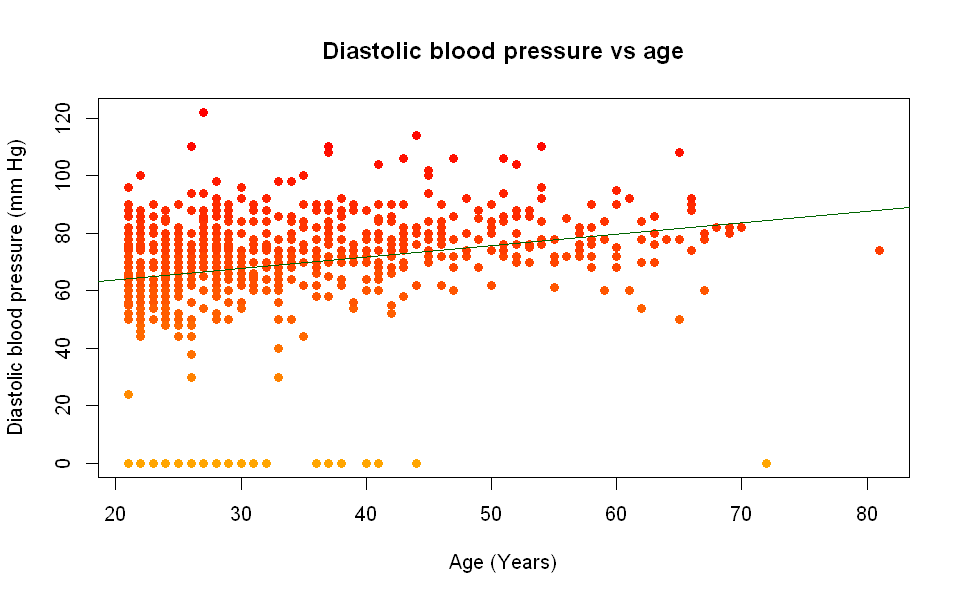

In [29]:
blood_fit <- lm(pres~age, data = pima)
pima$Col <- rbPal(20)[as.numeric(cut(pima$pres,breaks = 20))]
plot(pima$pres~pima$age, type = 'p', main = "Diastolic blood pressure vs age", xlab = "Age (Years)", 
     ylab = "Diastolic blood pressure (mm Hg)", col = pima$Col, pch = 16, lwd = 4)
abline(blood_fit, col = 'darkgreen')

blood_fit[[1]][2] # the slope of the equation.

#95% confidence interval for the mean diastolic blood pressure of a 40 yr old female of the Pima people.
confint(blood_fit)
# predicted mean of diastolic blood pressure when pima female is 40 years old.
predict(blood_fit, newdata=data.frame(age=c(40)))
# 95 % confidence interval for predicted mean
predict(blood_fit, newdata =data.frame(age=c(40)), interval ="conf")

### Interpretation

The slope of the regression $b = 0.395$ can be interpreted as saying for every 1 unit increase in age (1 unit being 1 year in this case), there is a 0.39 unit increase in diastolic blood pressure. 

The predicted mean diastolic blood pressure for a pima indian woman at age 40 is $71.78 mm Hg$. This is within a 95% confidence interval of $70.24 mm Hg$ to $73.32 mm Hg$. 

#### Question 3

(a) Each row of the file is an observation relating to one person from Australia. The file contains the variables:

* City: The city in which the person lives.
* Movie: A movie that the person most recently watched.
* Age: The age of the person.
* Rating: The rating (out of 10) that the person gave the movie.

# Load project dataset.

In [31]:
project <- read.csv("C:/Users/User/Documents/GitHub/Statistics/project.csv")
head(project, 10)
dim(project)

City,Movie,Age,Rating
Sydney,Undergoal,24,8
Melbourne,The Cat with Two Tales,27,8
Melbourne,The Cat with Two Tales,15,8
Melbourne,The Cat with Two Tales,30,7
Perth,Washing Dishes 3,46,8
Brisbane,The Cat with Two Tales,14,8
Sydney,The Cat with Two Tales,33,9
Sydney,The Cat with Two Tales,23,7
Brisbane,Undergoal,27,8
Melbourne,Undergoal,36,9


[1] 1000    4

##### Representative Sample
Our sample is from the six Australian cities with population counts shown below.

| City | Population | Proportion |
| ------------- |:-------------:| -----:|
| Sydney | 5,131,326 | 0.321 |
| Melbourne | 4,850,740 | 0.304 |
| Brisbane | 2,408,223 | 0.151 |
| Adelaide | 1,313,927 | 0.082 |
| Perth | 2,050,138 | 0.128 |
| Hobart | 226,884 | 0.014 |


(b) test if the distribution of cities in the data matches the above population proportions of the cities.

Goodness of fit test

calculate the expected values for the population count data. 


	Chi-squared test for given probabilities

data:  obs_val
X-squared = 7.679, df = 5, p-value = 0.1748


The p value using the chisq.test function is: 0.1748363 
The p value from the simulation is: 0.1711

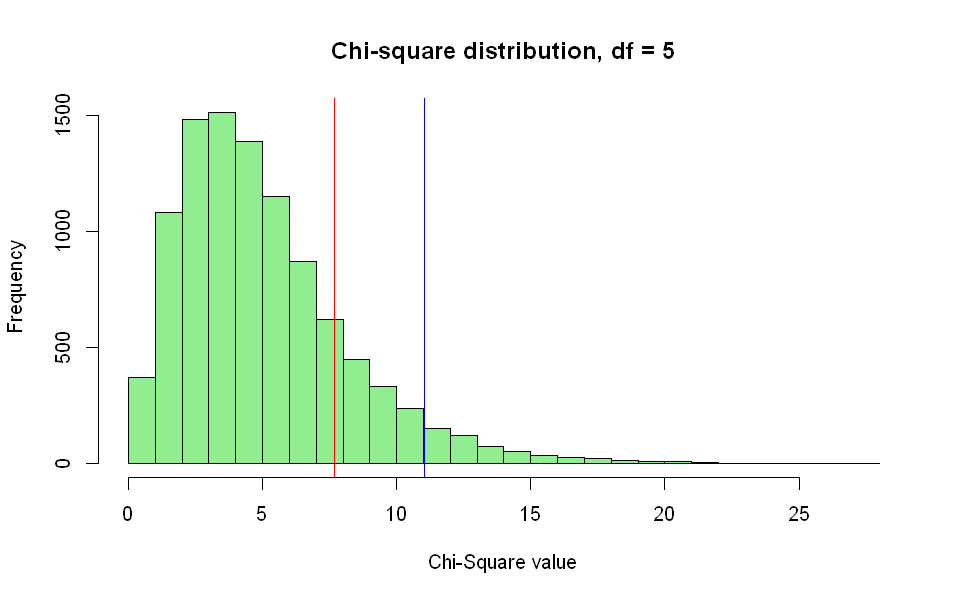

In [32]:
# calculate the expected values for the population count data
prop <- c(0.321, 0.304, 0.151, 0.082, 0.128, 0.014)
cities  <- c("Sydney", "Melbourne", "Brisbane", "Adelaide", "Perth", "Hobart")

# expected values
e <- (length(project$City)*prop)
names(e) <- cities

#observed values
obs_val <- table(project$City)[c("Sydney", "Melbourne", "Brisbane", "Adelaide", "Perth", "Hobart")]

chi_fit <- sum((obs_val-e)^2/e)

# CHI SQUARE FUNCTION VERSION

chisq.test(obs_val, p = prop)
cat("The p value using the chisq.test function is:", chisq.test(obs_val, p=prop)$p.value, "\n")

# simulation of chi-square distribution where df = 5
set.seed(1)
x = replicate(10000, {
    counts = rmultinom(1, 1000, prop)
    chisq = sum((counts-e)^2/e)
})

cat("The p value from the simulation is:", mean(x>chi_fit))

hist(x, col = 'lightgreen', main = "Chi-square distribution, df = 5", xlab = "Chi-Square value", breaks = 20)
abline(v = chi_fit, col = 'red')
abline(v = quantile(x, c(0.95)), col = 'blue')


Yes the sample data matches the above propotions of the population of the cities. The sample data has a p value of $p = 0.1711$ so it is not statistically significant, it is within the bounds of the expected values.

#### Chosen Movie

It is believed that people from difference cities have different preferences. 

(c) Is there a dependence between the sample variables City and Chosen Movie?

In [33]:
# create a contingency table
ctable <- table(project[c("City", "Movie")])
ctable
total_row <- as.vector(apply(ctable, 1, sum))
ctable <- cbind(ctable, total_row)
total_col <- as.vector(apply(ctable, 2, sum))
ctable <- rbind(ctable, total_col)
ctable

chisq.test(ctable[1:6, 1:3])

           Movie
City        The Cat with Two Tales Undergoal Washing Dishes 3
  Adelaide                      52        15               34
  Brisbane                      80        23               45
  Hobart                         9         5                4
  Melbourne                    166        59               70
  Perth                         55        27               31
  Sydney                       187        55               83

,The Cat with Two Tales,Undergoal,Washing Dishes 3,total_row
Adelaide,52,15,34,101
Brisbane,80,23,45,148
Hobart,9,5,4,18
Melbourne,166,59,70,295
Perth,55,27,31,113
Sydney,187,55,83,325
total_col,549,184,267,1000


Warning message in chisq.test(ctable[1:6, 1:3]):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  ctable[1:6, 1:3]
X-squared = 10.375, df = 10, p-value = 0.4082


There is currently no reason to accept the alternative hypothesis that movie preference and the city a person resides in is dependent. The p value of the chi-squared test for independence is $p = 0.4082$, which is greater than the 0.05 significance level. Thus we do not reject the null hypothesis that movie preference and the city a person resides in is independent. 

#### Harsh Raters

As people grow older, it is believed that they expect more from movies and so provide lower ratings. 

(d) To answer this question, test if there is a difference in the mean rating for people over and including 40 years old, compared to the mean rating from people under 40 years old.

In [34]:
forty.and.over <- project[c(project["Age"] >= 40), "Rating" ]
under.forty <- project[c(project["Age"] < 40), "Rating" ]
mean_40plus <- mean(forty.and.over)
mean_under40 <- mean(under.forty)

# Means of ratings.
mean_40plus
mean_under40

t.test(forty.and.over, under.forty, alternative = "less")

[1] 7.056701

[1] 7.401985


	Welch Two Sample t-test

data:  forty.and.over and under.forty
t = -5.7077, df = 293.34, p-value = 1.401e-08
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -0.245464
sample estimates:
mean of x mean of y 
 7.056701  7.401985 


The Null hypothesis $H_{0}$ for this test is that difference in the mean ratings for movies between those who are forty and over, versus those who are under 40 is zero (0) - there is no statistically significant difference in the means. 

The alternative hypothesis $H_{a}$ however, is that older people (those forty and over) expect more from movies, thus the overall mean ratings for forty and over's should be less than that of those under forty. Therefore the alternative hypothesis is that $\mu_{older} < \mu_{younger}$ thus the true difference in means should be less than 0 ($\mu_{older}-\mu_{younger} < 0$).

As the t-test shows, there is a statistially significant difference with the t-value, giving a p-value of $ p=1.041x10^{-8}$. Therefore we should reject the null hypothesis and accept the alternative, that the true difference is means is less than zero, which is the hypothesis that older people tend to rate movies lower than younger people since they expect more.

#### Best Movie

(e) Is there evidence that the movies are not equally preferred? Test if all mean ratings are equal for each movie? If there is not equal preference, which is preferred over which?

In [35]:
# F test and ANOVA

Fstat <- oneway.test(Rating~Movie, data = project, var.equal = TRUE)
Fstat$statistic
Fstat

#simulation 

x <- replicate(1000, {
    movie.perm <- sample(project$Movie)
    oneway.test(Rating~movie.perm, data = project, var.equal = TRUE)$statistic
    })

cat("The P-value given by the simulation is:",mean(x > Fstat$statistic))

# Use Tukey test to determine which of the movies is preferred by looking at the means.

fit <- aov(Rating~Movie, data = project)
summary(fit)
tt <- TukeyHSD(fit)
tt$Movie[, "p adj"]

F 
19.67666


	One-way analysis of means

data:  Rating and Movie
F = 19.677, num df = 2, denom df = 997, p-value = 4.158e-09


The P-value given by the simulation is: 0

             Df Sum Sq Mean Sq F value   Pr(>F)    
Movie         2   22.4   11.22   19.68 4.16e-09 ***
Residuals   997  568.3    0.57                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Undergoal-The Cat with Two Tales Washing Dishes 3-The Cat with Two Tales 
                           1.568610e-02                            2.695881e-09 
             Washing Dishes 3-Undergoal 
                           4.922001e-02

In [36]:
# plot
options(repr.plot.width = 8, repr.plot.height = 5)
par(mar= c(2,20,4,0.5), cex = 0.9)
plot(tt, las=1)

### Results

As we can see from the F-test, the value given is $F = 19.677$, therefore the means are not equal as there is a statistically significant result from the comparison of the means ($P= 4.16 x 10^{-9}$). 

Using Tukey's HSD test, we can see which movies are preferred over which. The plot above shows that the Cat with two tails is prefered over undergoal and washing dishes 3 (with p values $p = 0.016$ and $p = 2.7 x 10^{-9}$ respectively), and that undergoal is preferred over Washing Dishes 3 ($p = 0.049$). 

#### Age and Ratings

(f) We found that older people rate movies lower. Using a linear model of Rating as a function of Age, is there evidence that the gradient is not zero? Use the model to predict the expected rating for someone of age 32.

In [36]:
#linear model function
fit_ratings <- lm(Rating~Age, data = project)
fit_ratings
# coef(fit_ratings) - allows us to extract intercept and gradient from the fitted model if we want.
summary(fit_ratings)
# predict expected rating for somebody of age 32
#direct
exp_rat_32 <- coef(fit_ratings)[[2]]*32 + coef(fit_ratings)[[1]]
exp_rat_32
#using predict function
predict_32 <- predict(fit_ratings, newdata =data.frame(Age=c(32)))
cat("The expected rating for a movie given by somebody of the age 32 is: ", predict_32[[1]])


Call:
lm(formula = Rating ~ Age, data = project)

Coefficients:
(Intercept)          Age  
    7.94582     -0.01961  



Call:
lm(formula = Rating ~ Age, data = project)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0635 -0.4557 -0.1616  0.5836  2.5443 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.945823   0.073595 107.966   <2e-16 ***
Age         -0.019607   0.002239  -8.756   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7414 on 998 degrees of freedom
Multiple R-squared:  0.07134,	Adjusted R-squared:  0.07041 
F-statistic: 76.67 on 1 and 998 DF,  p-value: < 2.2e-16


[1] 7.318413

The expected rating for a movie given by somebody of the age 32 is:  7.318413

The null hypothesis is that the gradient is zero, however, we can see that the gradient result is statistically significant - therefore there is evidence that the gradient is not zero.

The expected rating for a moving given by somebody of the age of 32 is: 7.318413